In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# New Section

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

In [108]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [109]:
data = pd.read_csv("heart.csv")

In [110]:
x = data.drop(['target'], axis = 1)
y = data.target

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [112]:
data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

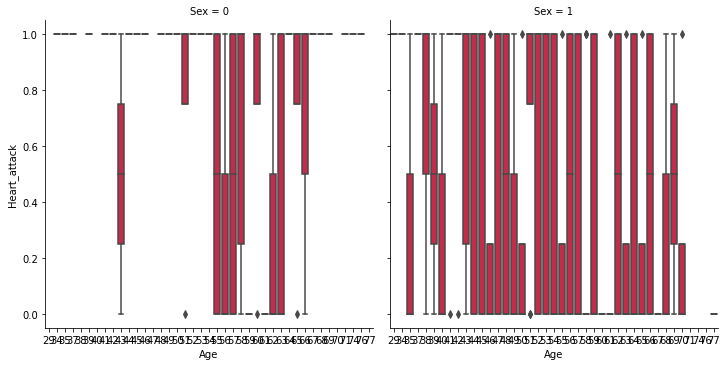

In [113]:
sns.catplot(x ='Age', y ='Heart_attack', col = 'Sex', data = data, color = 'crimson', kind = 'box')

In [114]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
accuracy2 = model2.score(x_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 86.88524590163934


In [115]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(x_train, y_train)
tree_classifier.best_params_

{'criterion': 'entropy'}

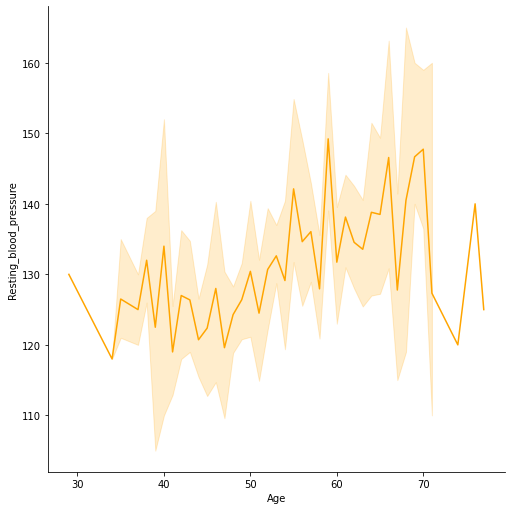

In [116]:
sns.relplot(x = 'Age', y = 'Resting_blood_pressure', kind = 'line', data=data,aspect = 1,height = 7, color = 'orange')

In [117]:
accuracy=[]

In [118]:
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(x_train,y_train)
accuracy2 = model2.score(x_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 85.24590163934425


In [119]:
data.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels                int64
Thalassemia_types            int64
Heart_attack                 int64
dtype: object

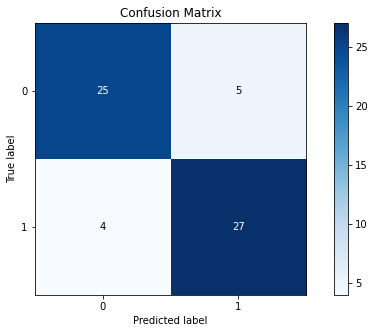

In [120]:
P = model2.predict(x_test)
matrix2 = (y_test,P)
skplt.metrics.plot_confusion_matrix(y_test ,P ,figsize=(10,5))
